# Convolutional Neural Network

### Importing the libraries

In [47]:
pip install tensorflow

In [48]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [49]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [50]:
tf.__version__

'2.16.2'

In [51]:
import matplotlib.pyplot as plt

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [52]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('datasets/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 50 images belonging to 2 classes.


### Preprocessing the Test set

In [53]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('datasets/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 10 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [54]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [55]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [56]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [57]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [58]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [59]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [60]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [61]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [62]:
trained_model = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 696ms/step - accuracy: 0.5422 - loss: 1.4666 - val_accuracy: 0.6000 - val_loss: 0.6863
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - accuracy: 0.4681 - loss: 0.8475 - val_accuracy: 0.5000 - val_loss: 0.8680
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - accuracy: 0.5133 - loss: 0.9857 - val_accuracy: 0.5000 - val_loss: 0.7139
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.4948 - loss: 0.7854 - val_accuracy: 0.5000 - val_loss: 0.6776
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.4925 - loss: 0.7046 - val_accuracy: 0.5000 - val_loss: 0.6826
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.6142 - loss: 0.6838 - val_accuracy: 0.7000 - val_loss: 0.6890
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.7538 - loss: 0.6794 - val_accuracy: 0.6000 - val_loss: 0.6931
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - accuracy: 0.7196 - loss: 0.6746 - val_accuracy: 0.8000 - val_loss:

## Part 4 - Making a single prediction

In [63]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('datasets/single_prediction/check_4.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'pikachu'
else:
  prediction = 'raichu'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [64]:
print(prediction)

raichu


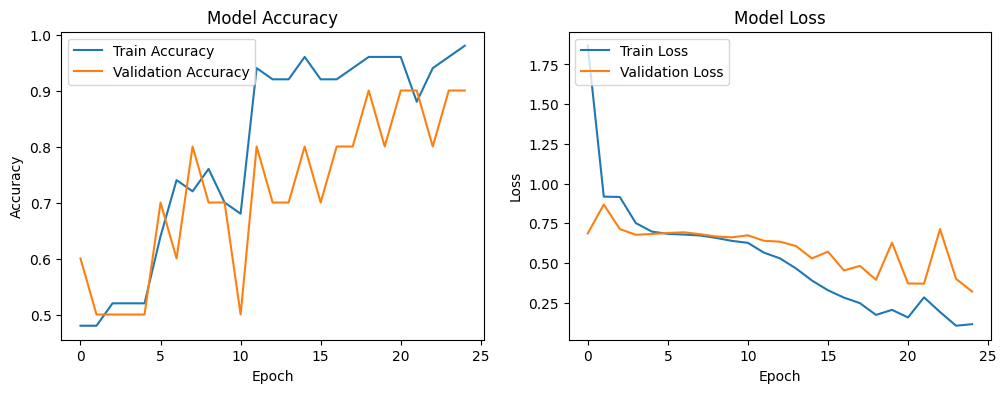

In [65]:
# Function to plot the training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')

    plt.show()

# Call the function to plot the training history
plot_training_history(trained_model)
